# Predict whether income exceeds $50K/yr based on census data

## Data Source
https://archive.ics.uci.edu/ml/datasets/Census%2BIncome



In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data 
df = pd.read_csv(Path('Resources/data.csv', index_col=False))
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#columns of dataframe
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
# Load in data with appropraite columns name

columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'   
]


In [5]:
df_income = pd.read_csv('Resources/data.csv', header=None, names=columns, index_col=False)
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#shape of dataframe
df_income.shape

(32561, 15)

In [7]:
#looking for nan value
df_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
#info of dataframe
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df_income.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df_income.to_csv('Resources/clean_data.csv', index=False)

## Data Visulization

In [11]:
df_income['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

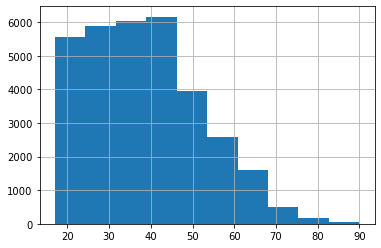

In [12]:
#Age 
df_income['age'].hist()
plt.show()

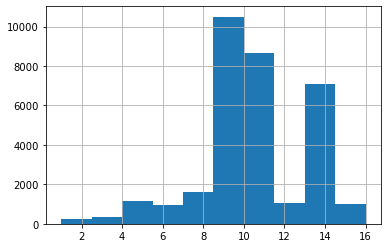

In [14]:
#education_num
df_income['education_num'].hist()
plt.show()

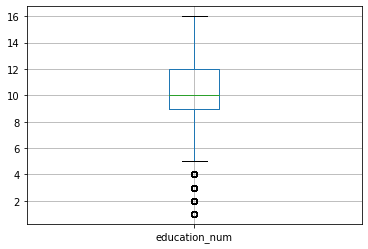

In [15]:
df_income.boxplot('education_num')
plt.show()

In [16]:
#correlation of columns
df_num=df_income[['age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week']]
corr=df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


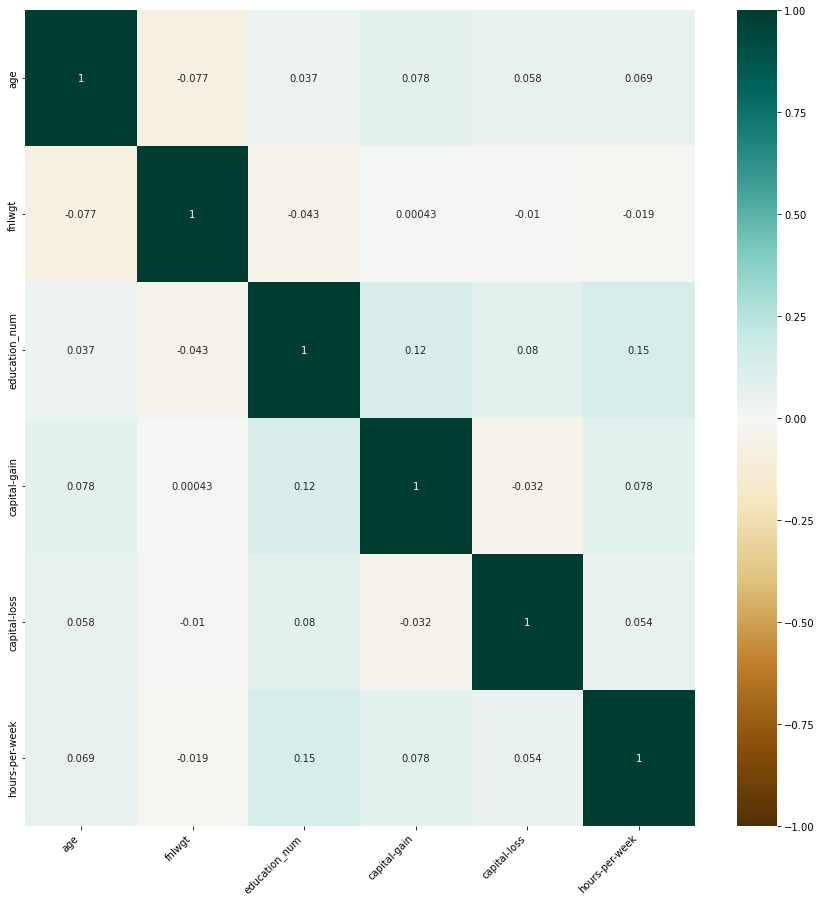

In [17]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, ax=ax, cmap='BrBG',annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       horizontalalignment='right')
plt.show()

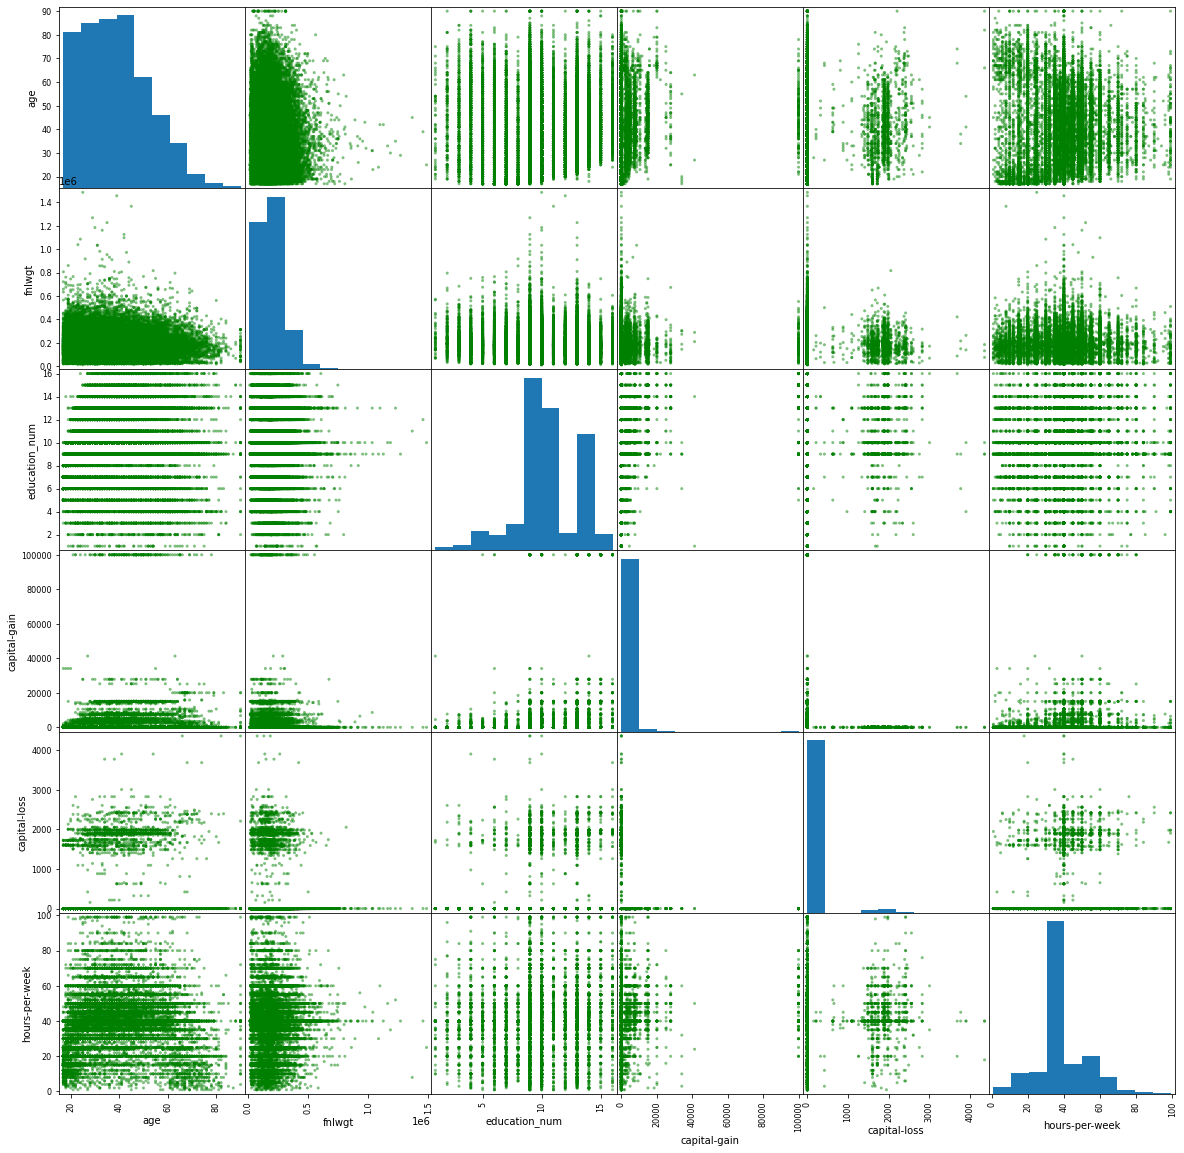

In [18]:
#Scatter matrix plot
pd.plotting.scatter_matrix(df_num,c='g', figsize=(20,20))
plt.show()

In [20]:
# categorical plots
df_cat=df_income[[
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income' ]]

Graph for workclass column: Total = 9


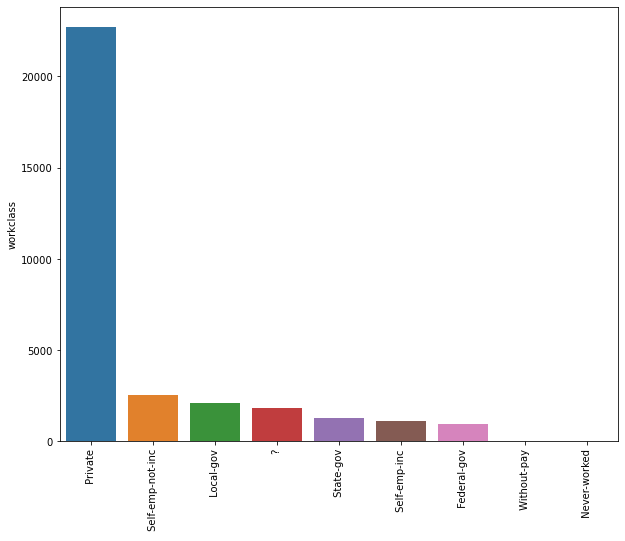

Graph for education column: Total = 16


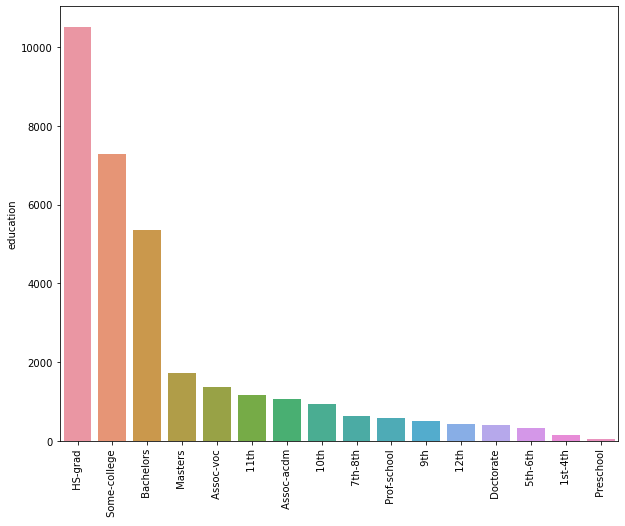

Graph for marital_status column: Total = 7


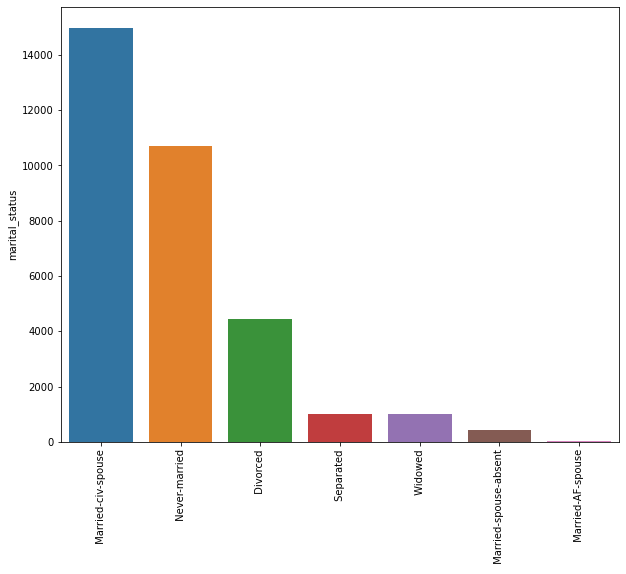

Graph for occupation column: Total = 15


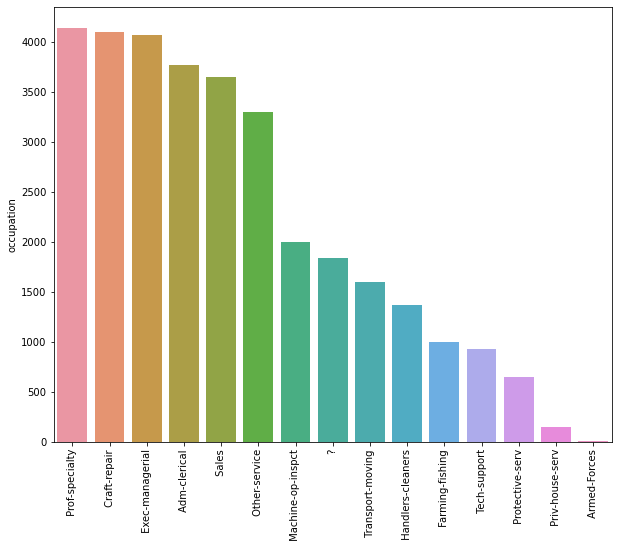

Graph for relationship column: Total = 6


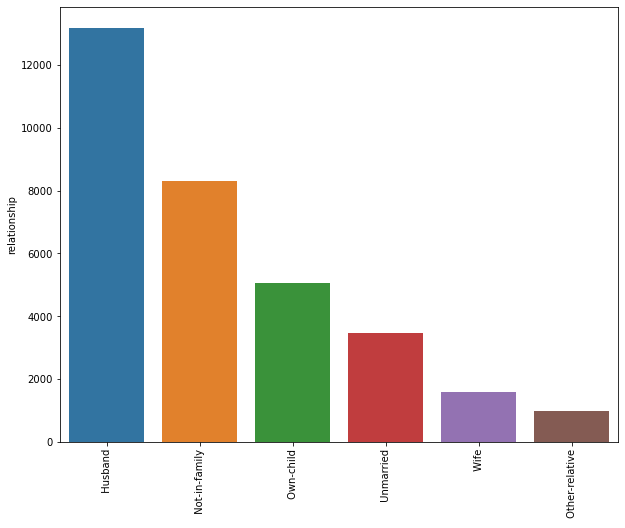

Graph for race column: Total = 5


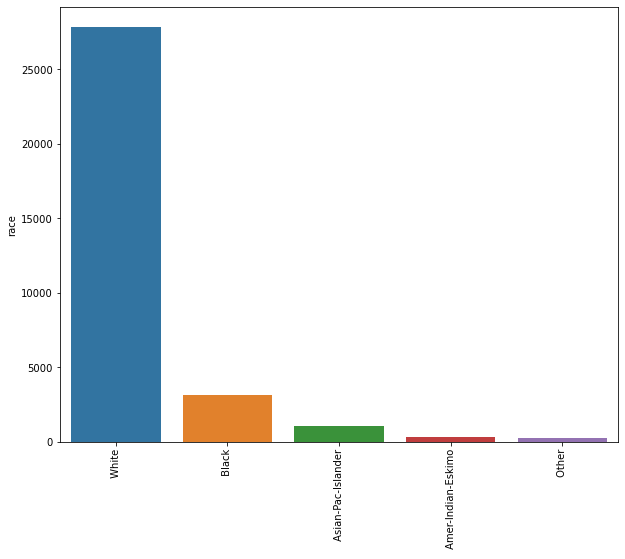

Graph for sex column: Total = 2


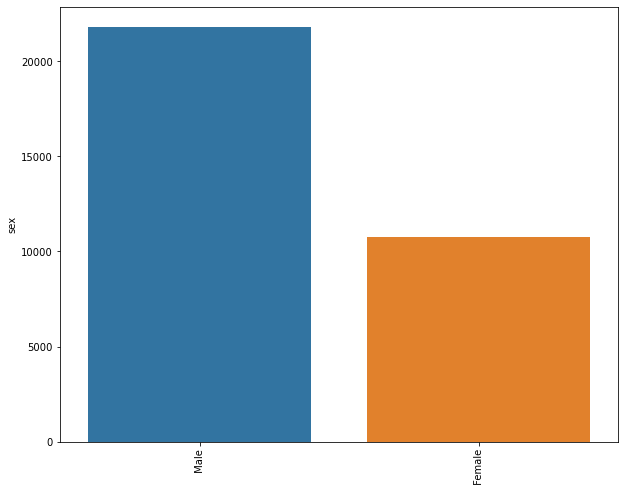

Graph for native-country column: Total = 42


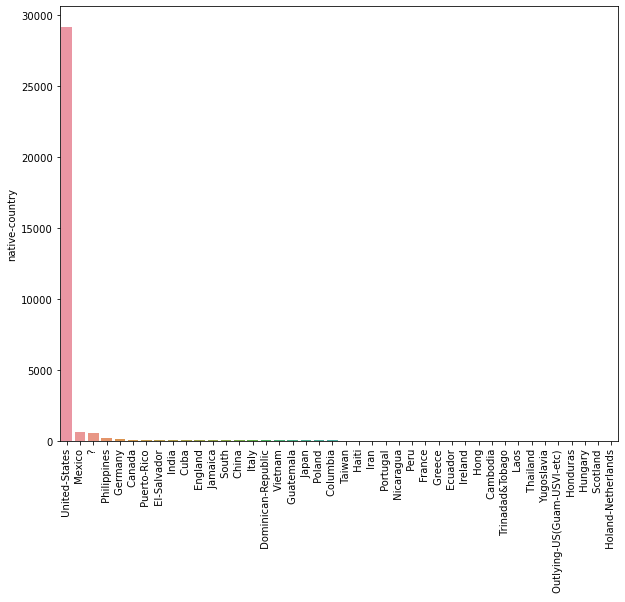

Graph for income column: Total = 2


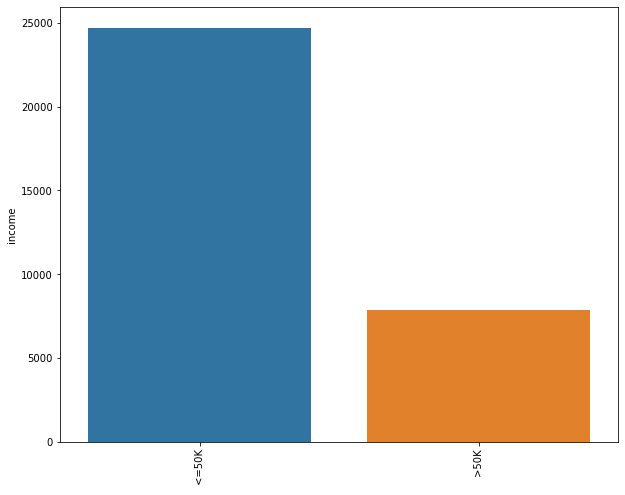

In [25]:
for cat in df_cat.columns:
    fig,ax=plt.subplots(figsize=(10,8))
    cat_num=df_cat[cat].value_counts()
    chart=sns.barplot(x=cat_num.index, y=cat_num, ax=ax)
    print('Graph for {} column: Total = {}'.format(cat, len(cat_num)))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

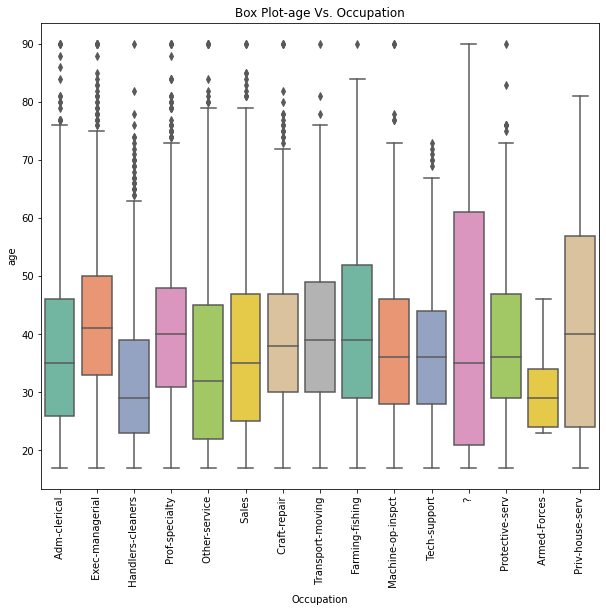

********************************************************************************


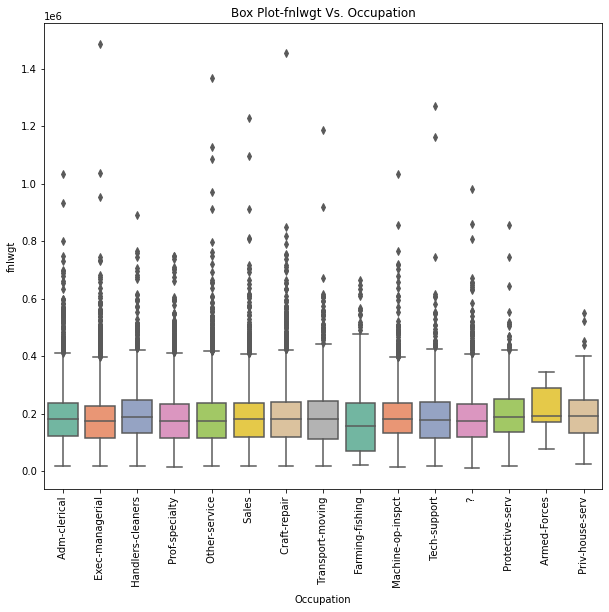

********************************************************************************


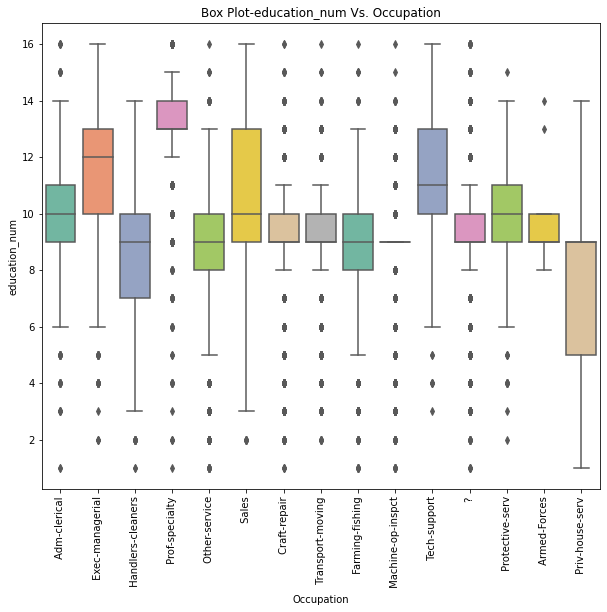

********************************************************************************


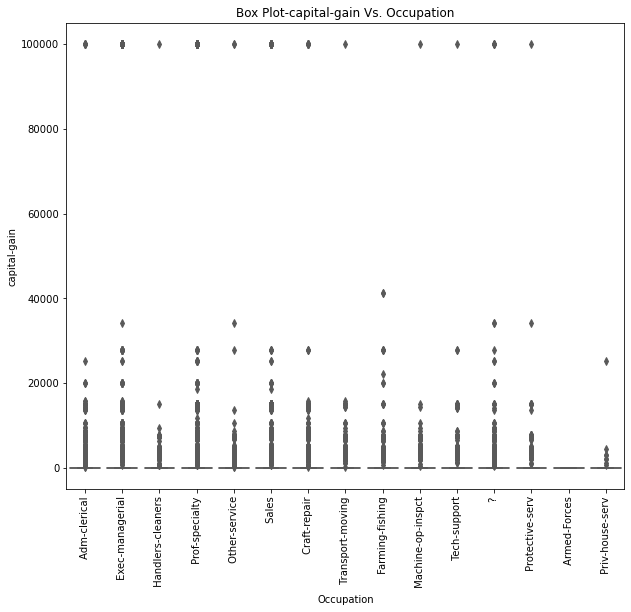

********************************************************************************


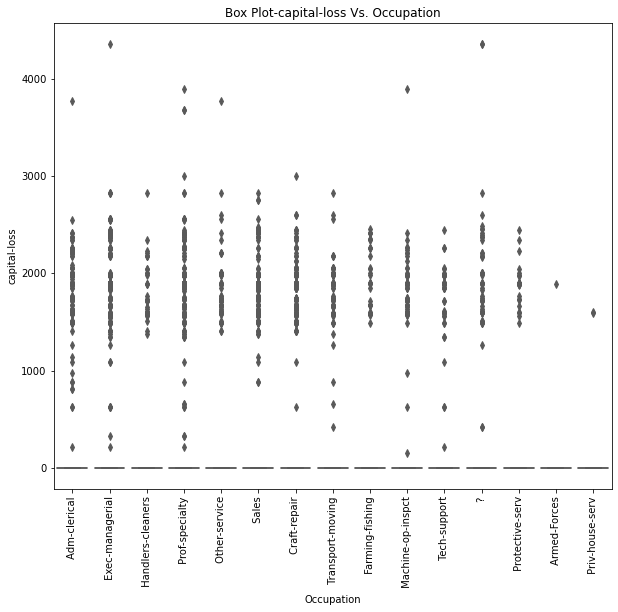

********************************************************************************


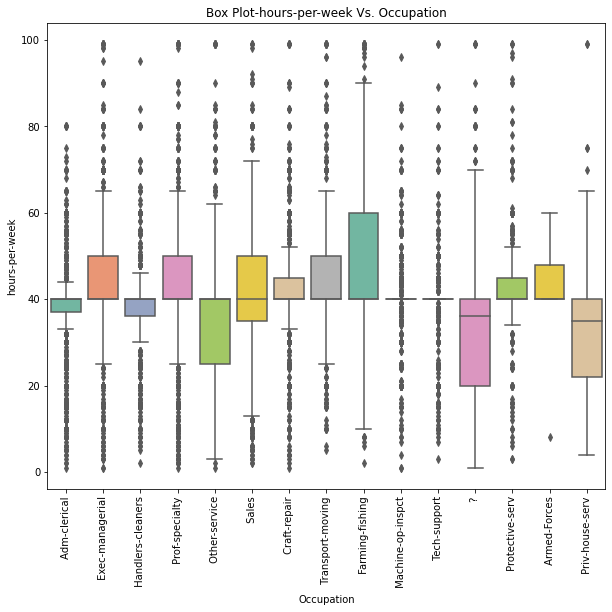

********************************************************************************


In [42]:
# Box plots occupation vs others
cols=[
    'age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week' ]
for j in range(1, 7):
    fig = plt.figure(figsize=(10,60))
    ax = fig.add_subplot(6, 1, j)

    sns.boxplot(x='occupation', y=cols[j-1],
            data=df_income,  palette="Set2",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('Occupation')
    ax.set_title(f'Box Plot-{cols[j-1]} Vs. Occupation')
    fig.savefig(f'figures/Boxplot_{cols[j-1]}_Vs.Occupation.png', bbox_inches="tight")
    plt.show()
    print('*'*80)

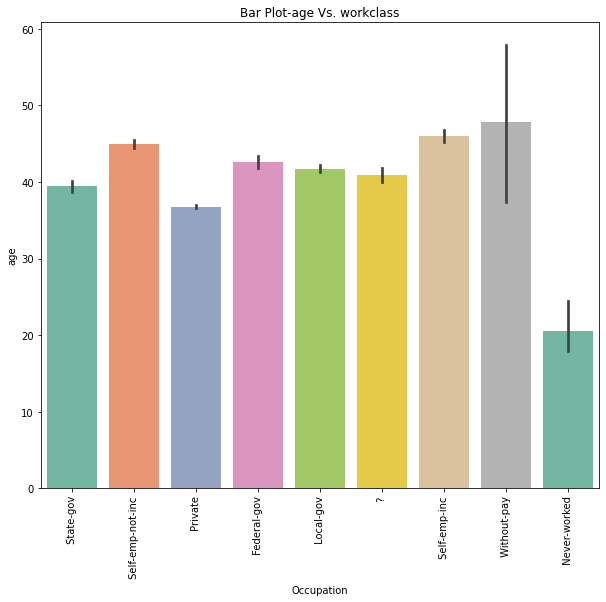

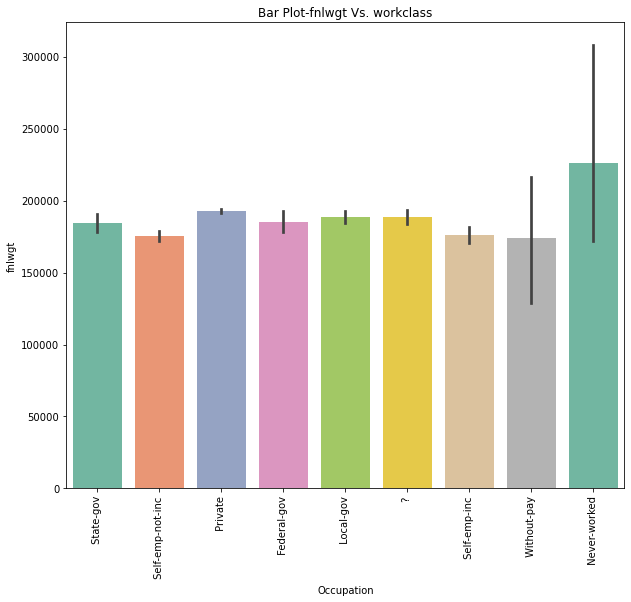

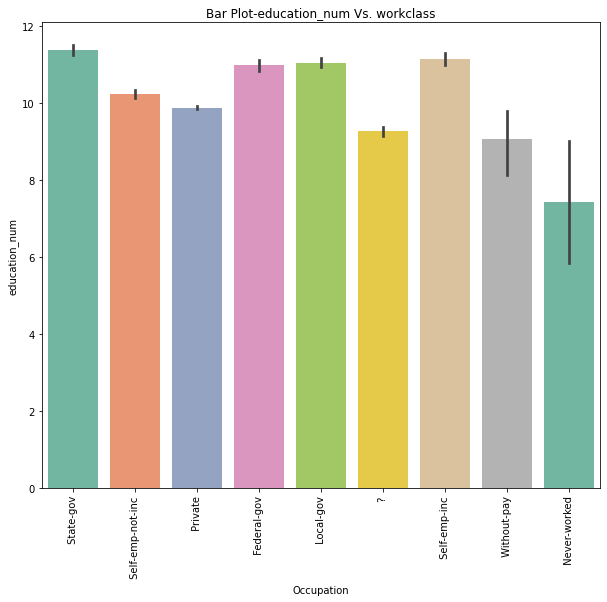

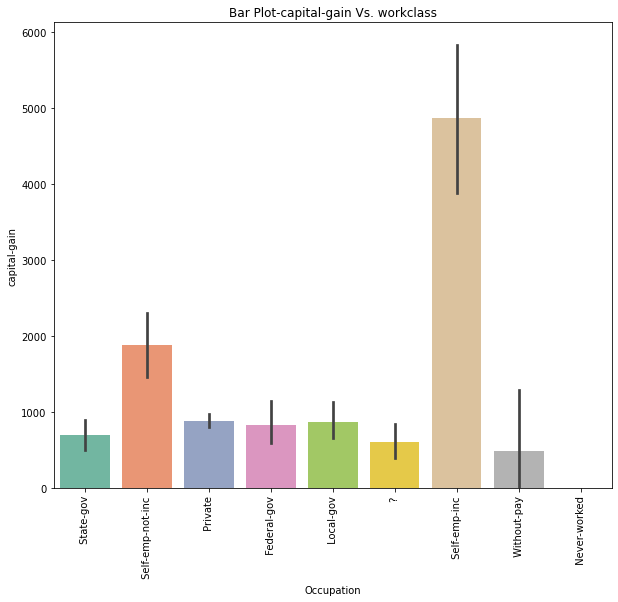

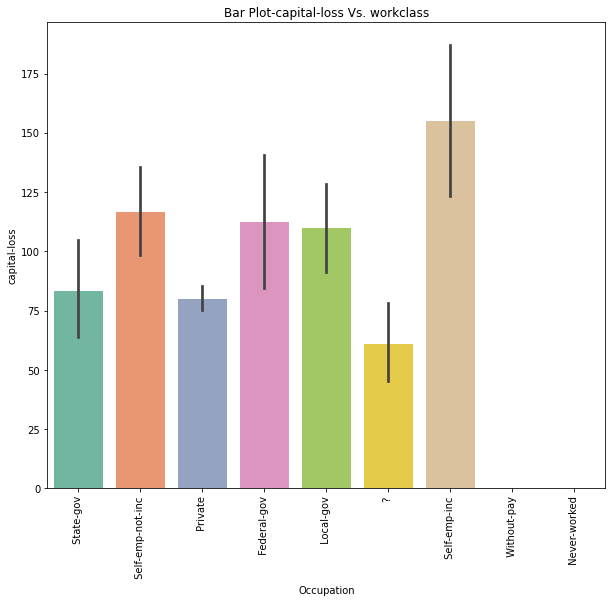

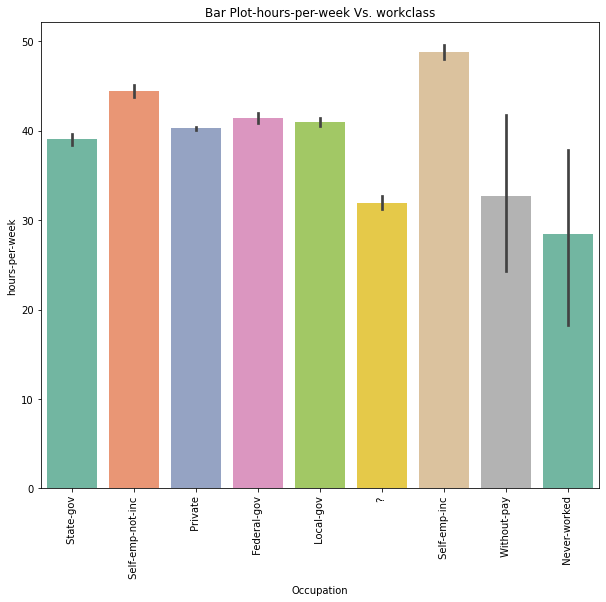

********************************************************************************


In [41]:
# Bar plots workclass vs others
cols=[
    'age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week' ]
for j in range(1, 7):
    fig = plt.figure(figsize=(10,60))
    ax = fig.add_subplot(6, 1, j)

    sns.barplot(x='workclass', y=cols[j-1],
            data=df_income,  palette="Set2",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('Occupation')
    ax.set_title(f'Bar Plot-{cols[j-1]} Vs. workclass')
    fig.savefig(f'figures/Boxplot_{cols[j-1]}_Vs.workclass.png', bbox_inches="tight")
    plt.show()
print('*'*80)

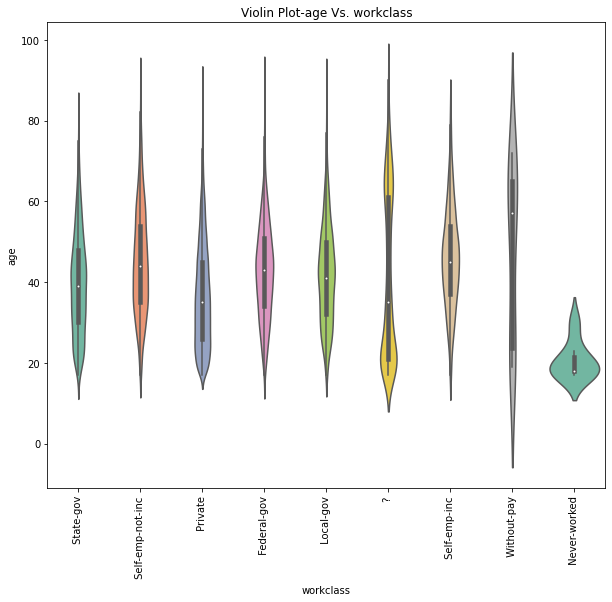

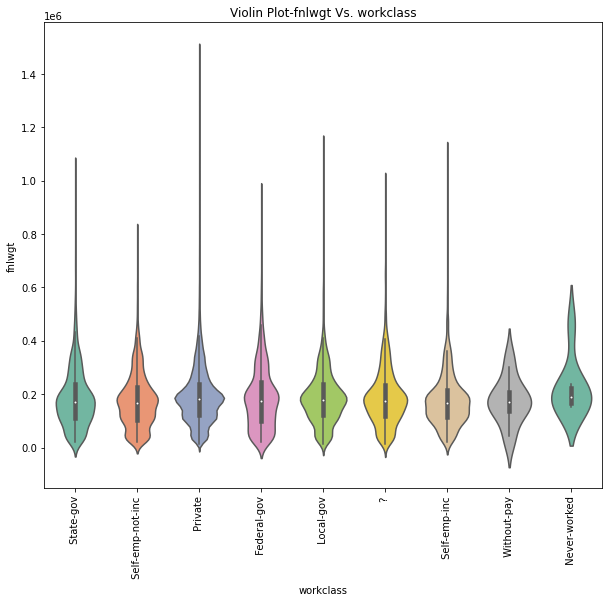

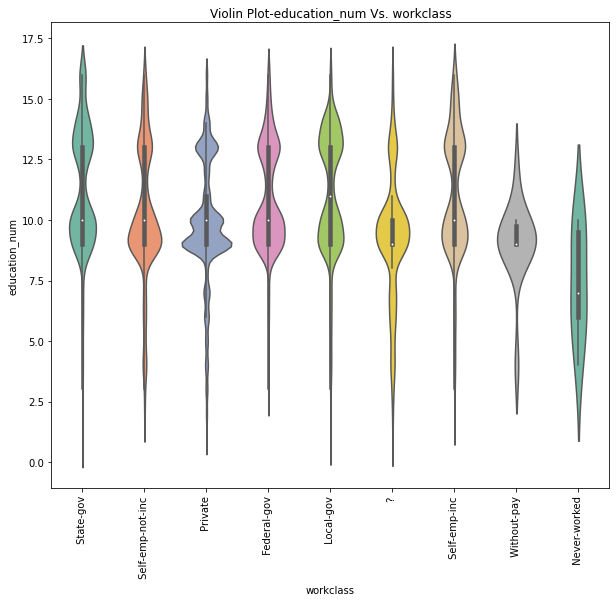

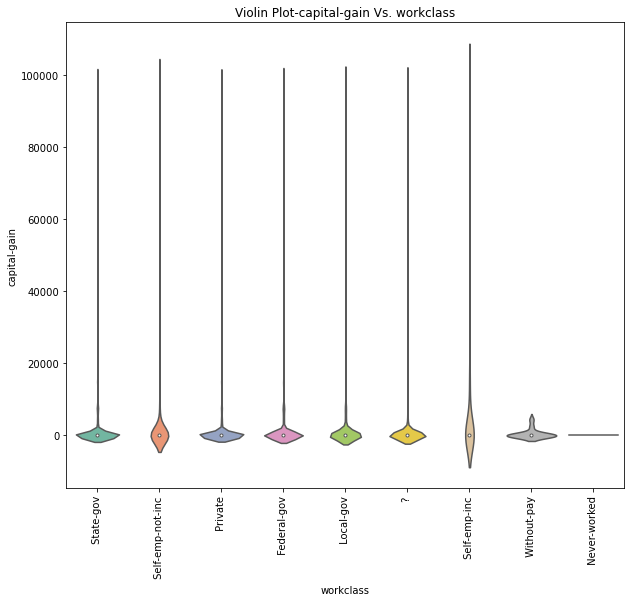

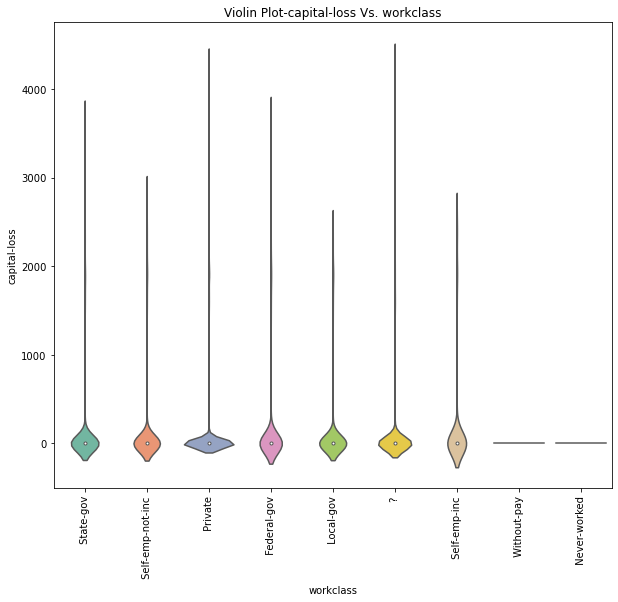

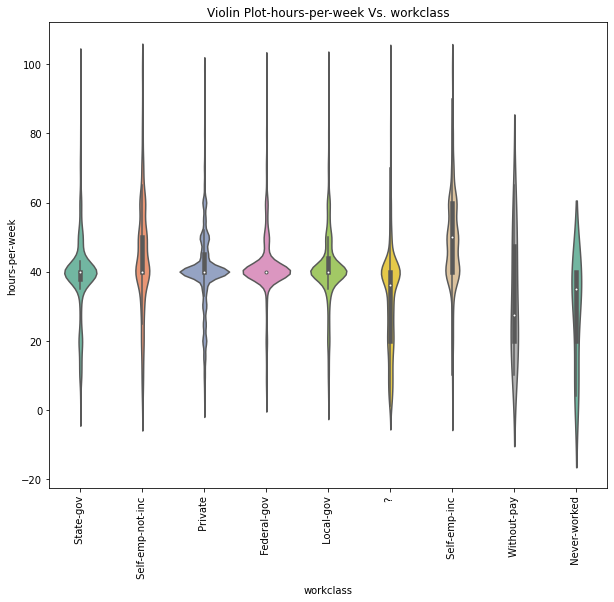

********************************************************************************


In [40]:
# Violin plots of  race vs others
cols=[
    'age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week' ]
for j in range(1, 7):
    fig = plt.figure(figsize=(10,60))
    ax = fig.add_subplot(6, 1, j)

    sns.violinplot(x='workclass', y=cols[j-1],
            data=df_income,  palette="Set2",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('workclass')
    ax.set_title(f'Violin Plot-{cols[j-1]} Vs. workclass')
    fig.savefig(f'figures/Boxplot_{cols[j-1]}_Vs.workclass.png', bbox_inches="tight")
    plt.show()
print('*'*80)

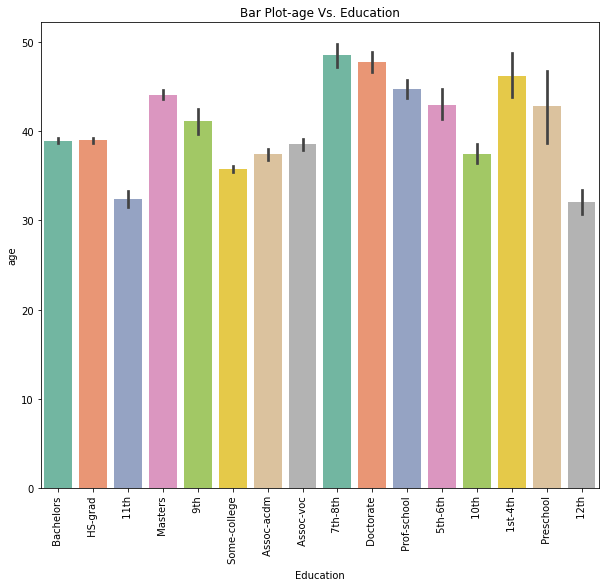

********************************************************************************


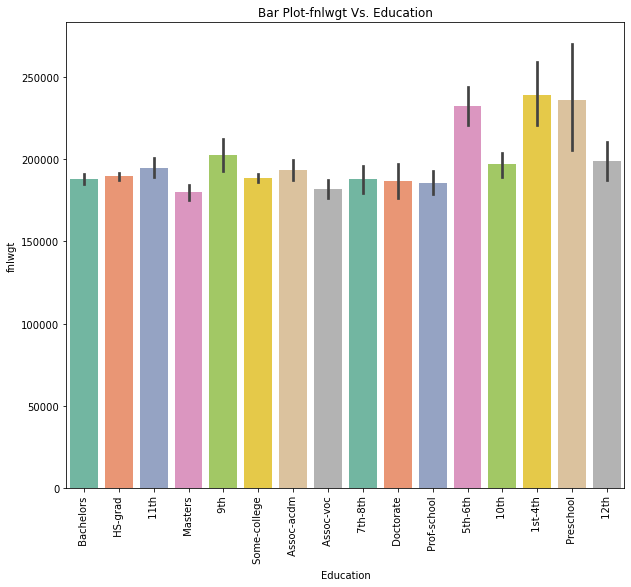

********************************************************************************


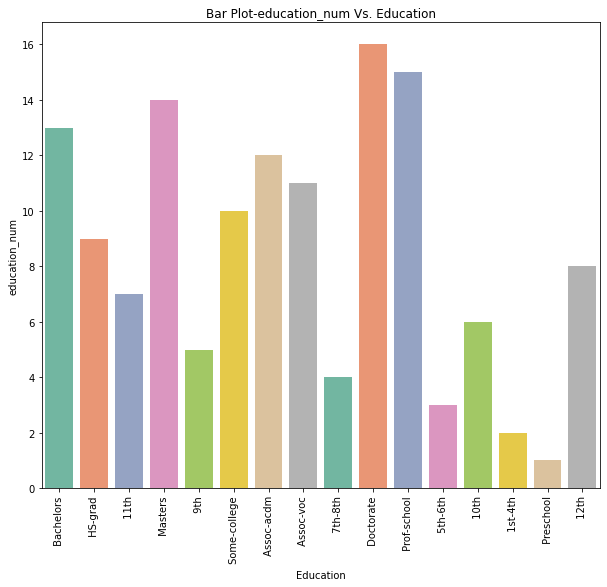

********************************************************************************


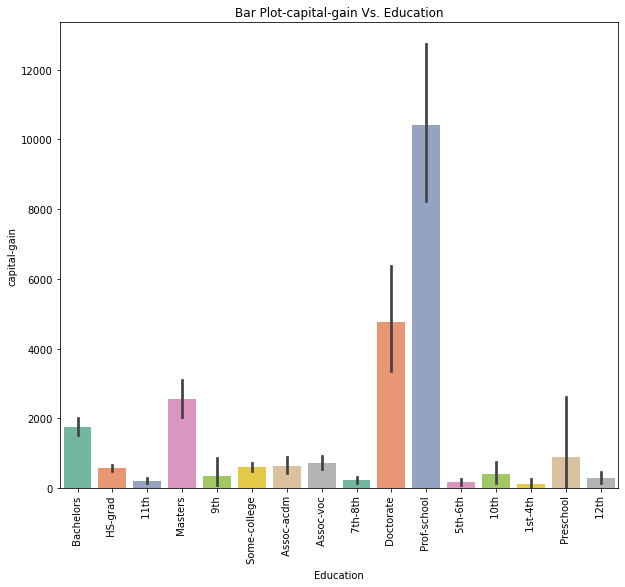

********************************************************************************


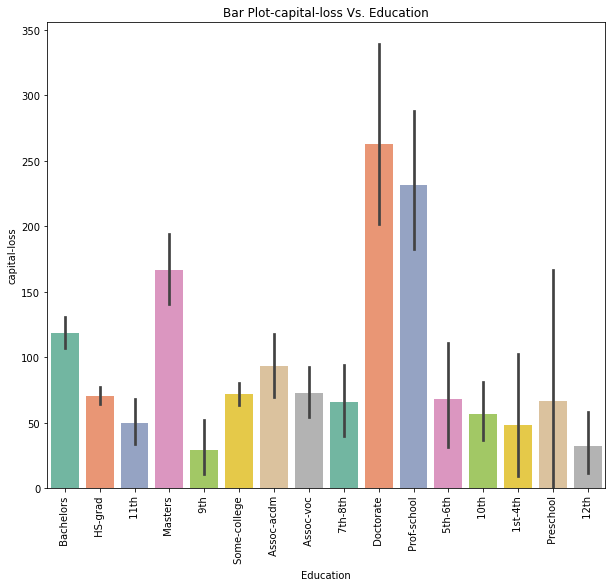

********************************************************************************


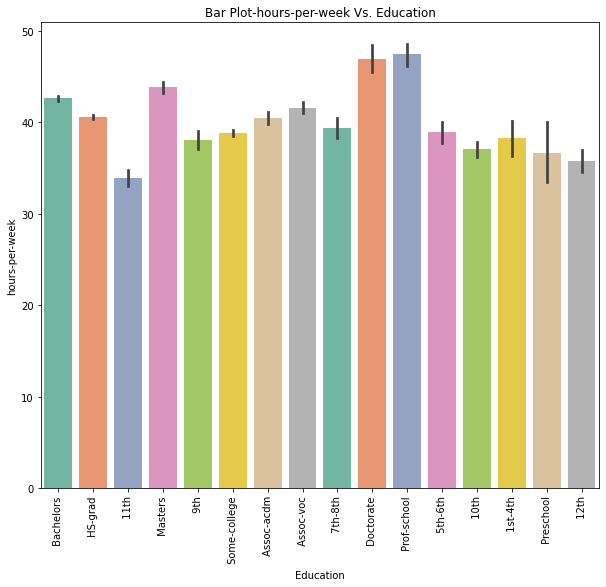

********************************************************************************


In [39]:
# Bar plots education vs others
cols=[
    'age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week' ]
for j in range(1, 7):
    fig = plt.figure(figsize=(10,60))
    ax = fig.add_subplot(6, 1, j)

    sns.barplot(x='education', y=cols[j-1],
            data=df_income,  palette="Set2",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('Education')
    ax.set_title(f'Bar Plot-{cols[j-1]} Vs. Education')
    fig.savefig(f'figures/Boxplot_{cols[j-1]}_Vs.Education.png', bbox_inches="tight")
    plt.show()
    print('*'*80)